In [1]:
from numpy import dtype
from ucimlrepo import fetch_ucirepo
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv("healthcare_dataset.csv")

In [ ]:
data = np.loadtxt("healthcare_dataset.csv", skiprows=0)

# Healthcare dataset

Name: This column represents the name of the patient associated with the healthcare record.

Age: The age of the patient at the time of admission, expressed in years.

Gender: Indicates the gender of the patient, either "Male" or "Female."

Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

Date of Admission: The date on which the patient was admitted to the healthcare facility.

Doctor: The name of the doctor responsible for the patient's care during their admission.

Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

Room Number: The room number where the patient was accommodated during their admission.

Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

## Used / modified features
- age
- gender
- blood type
- medical condition
- doctor
- 


In [ ]:
data = pd.read_csv("../data/healthcare_dataset.csv")

In [ ]:
data

In [ ]:
plt.hist(data["Billing Amount"], bins=100)

In [ ]:
amount_spend = data["Billing Amount"]

In [ ]:
Counter(data["Blood Type"])

In [ ]:
values = []
for amount in amount_spend[:1000]:
    if(amount // 1e4 == -1):
        print(amount, amount // 1e4)
    
    values.append(amount // 1e4)

In [ ]:
Counter(values)

In [ ]:
24830.16460954 // 1e4

In [ ]:
age_split = []
for age in data["Age"][:1000]:

    
    age_split.append(age // 5)

In [ ]:
c = Counter(age_split)

In [ ]:
plt.bar(c.keys(), c.values())

Jak zastosować kodowanie z gorącą jedynką (ang. one hot) w drzewie decyzyjnym?

Z tego co na razie zrozumiałem, należy po prostu zwiększyć liczbę kolumn i kodowac na zasadzie 1 vs reszta. Przykładowo dla 3 kolorów [czerwony, zielony, niebieski] kodować kolumnami: one_hot_red, one_hot_green, one_hot_blue

In [ ]:
from numpy import dtype
from ucimlrepo import fetch_ucirepo
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
#####################################################################################################
importlib.reload(random_forest)
X = np.loadtxt("../data_processed/healthcare/hot_one/X.csv", dtype=float, delimiter=",")
y = np.loadtxt("../data_processed/healthcare/hot_one/y.csv", dtype=float, delimiter=",")


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
accuracies = []
time1 = time.time()

for _ in range(1):
    y_pred = []
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=1.0)

    samples = len(y_test)
    correctly_predicted = 0
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        y_pred.append(np.argmax(prediction))
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    y_pred = np.array(y_pred)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

[0.36 0.36 0.28] 1.0
[0.5  0.22 0.28] 2.0
[0.24 0.6  0.16] 1.0
[0.3 0.2 0.5] 1.0
[0.44 0.24 0.32] 0.0
[0.46 0.36 0.18] 0.0
[0.64 0.2  0.16] 0.0
[0.26 0.46 0.28] 2.0
[0.54 0.34 0.12] 1.0
[0.66 0.22 0.12] 0.0
[0.24 0.46 0.3 ] 1.0
[0.5  0.12 0.38] 0.0
[0.5  0.32 0.18] 2.0
[0.48 0.32 0.2 ] 2.0
[0.4  0.18 0.42] 0.0
[0.16 0.32 0.52] 0.0
[0.24 0.14 0.62] 2.0
[0.42 0.32 0.26] 1.0
[0.4  0.18 0.42] 1.0
[0.26 0.34 0.4 ] 1.0
[0.34 0.38 0.28] 1.0
[0.46 0.42 0.12] 2.0
[0.24 0.34 0.42] 0.0
[0.24 0.38 0.38] 0.0
[0.46 0.26 0.28] 0.0
[0.24 0.36 0.4 ] 0.0
[0.3 0.3 0.4] 1.0
[0.28 0.5  0.22] 1.0
[0.4  0.24 0.36] 0.0
[0.6  0.18 0.22] 0.0
[0.6  0.26 0.14] 2.0
[0.4  0.32 0.28] 2.0
[0.52 0.28 0.2 ] 0.0
[0.38 0.32 0.3 ] 1.0
[0.22 0.22 0.56] 2.0
[0.4  0.26 0.34] 2.0
[0.28 0.46 0.26] 1.0
[0.32 0.42 0.26] 0.0
[0.44 0.34 0.22] 0.0
[0.44 0.3  0.26] 0.0
[0.46 0.18 0.36] 1.0
[0.28 0.38 0.34] 2.0
[0.26 0.38 0.36] 2.0
[0.26 0.3  0.44] 2.0
[0.42 0.16 0.42] 1.0
[0.24 0.62 0.14] 2.0
[0.48 0.34 0.18] 1.0
[0.3  0.42 0.28] 2.

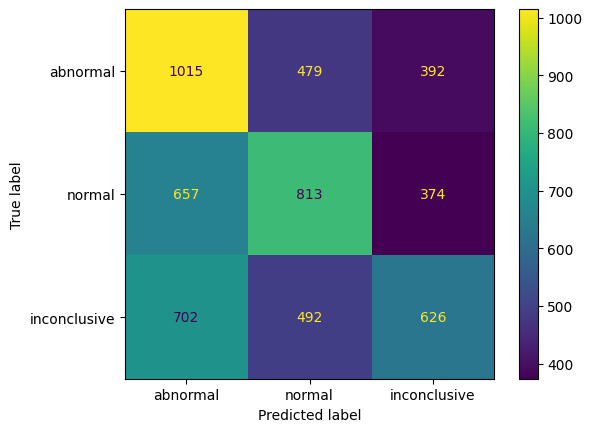

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot()
plt.show()